<a href="https://colab.research.google.com/github/Fitriasg/Belajar-Python/blob/main/Project_Akhir_Data_Analyst_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import requests
import datetime, time
import re

In [2]:
from requests.api import head
url_indo = 'https://data.covid19.go.id/public/api/update.json?_=1665726783937'
#url_prov = 'https://data.covid19.go.id/public/api/prov.json?_=1665726783940'
#url_kab = 'https://data.covid19.go.id/public/api/prov_detail_DKI_JAKARTA.json?_=1665727203003'
headers = {'User-Agent': 'Mozilla Firefox'}

indo = requests.get(url_indo, headers =  headers).json()
#prov = requests.get(url_prov, headers =  headers).json()
#kab = requests.get(url_kab, headers =  headers).json()

# DATA COVID DI INDONESIA

In [3]:
# Mari melihat isi dari dataset diatas 
 
indo['update']['harian']

[{'key_as_string': '2020-03-02T00:00:00.000Z',
  'key': 1583107200000,
  'doc_count': 1,
  'jumlah_meninggal': {'value': 0},
  'jumlah_sembuh': {'value': 0},
  'jumlah_positif': {'value': 2},
  'jumlah_dirawat': {'value': 2},
  'jumlah_positif_kum': {'value': 2},
  'jumlah_sembuh_kum': {'value': 0},
  'jumlah_meninggal_kum': {'value': 0},
  'jumlah_dirawat_kum': {'value': 2}},
 {'key_as_string': '2020-03-03T00:00:00.000Z',
  'key': 1583193600000,
  'doc_count': 1,
  'jumlah_meninggal': {'value': 0},
  'jumlah_sembuh': {'value': 0},
  'jumlah_positif': {'value': 0},
  'jumlah_dirawat': {'value': 0},
  'jumlah_positif_kum': {'value': 2},
  'jumlah_sembuh_kum': {'value': 0},
  'jumlah_meninggal_kum': {'value': 0},
  'jumlah_dirawat_kum': {'value': 2}},
 {'key_as_string': '2020-03-04T00:00:00.000Z',
  'key': 1583280000000,
  'doc_count': 1,
  'jumlah_meninggal': {'value': 0},
  'jumlah_sembuh': {'value': 0},
  'jumlah_positif': {'value': 0},
  'jumlah_dirawat': {'value': 0},
  'jumlah_posi

In [4]:
# Membaca data set ke dalam DataFrame, namun masih dalam dict json
df_indo = pd.DataFrame(
          data = indo['update']['harian']
)
df_indo.head()

,key_as_string,key,doc_count,jumlah_meninggal,jumlah_sembuh,jumlah_positif,jumlah_dirawat,jumlah_positif_kum,jumlah_sembuh_kum,jumlah_meninggal_kum,jumlah_dirawat_kum
0,2020-03-02T00:00:00.000Z,1583107200000,1,{'value': 0},{'value': 0},{'value': 2},{'value': 2},{'value': 2},{'value': 0},{'value': 0},{'value': 2}
1,2020-03-03T00:00:00.000Z,1583193600000,1,{'value': 0},{'value': 0},{'value': 0},{'value': 0},{'value': 2},{'value': 0},{'value': 0},{'value': 2}
2,2020-03-04T00:00:00.000Z,1583280000000,1,{'value': 0},{'value': 0},{'value': 0},{'value': 0},{'value': 2},{'value': 0},{'value': 0},{'value': 2}
3,2020-03-05T00:00:00.000Z,1583366400000,1,{'value': 0},{'value': 0},{'value': 0},{'value': 0},{'value': 2},{'value': 0},{'value': 0},{'value': 2}
4,2020-03-06T00:00:00.000Z,1583452800000,1,{'value': 0},{'value': 0},{'value': 2},{'value': 2},{'value': 4},{'value': 0},{'value': 0},{'value': 4}


In [5]:
# Untuk menggantinya disini saya mengubah menjdi list lalu di replace string 
# saya mendapat referensi dari yt ED enthusiast
df_indo[['jumlah_meninggal','jumlah_sembuh','jumlah_positif','jumlah_dirawat',
         'jumlah_positif_kum','jumlah_sembuh_kum','jumlah_meninggal_kum',
         'jumlah_dirawat_kum']] = df_indo[['jumlah_meninggal','jumlah_sembuh','jumlah_positif','jumlah_dirawat',
         'jumlah_positif_kum','jumlah_sembuh_kum','jumlah_meninggal_kum',
         'jumlah_dirawat_kum']].astype(str)

# or df_indo ['jumlah_meninggal'].str.extract('(-?\d+)')
df_indo['jumlah_meninggal'] = df_indo['jumlah_meninggal'].str.replace('({\'value\':|})','').str.strip()
df_indo['jumlah_sembuh'] = df_indo['jumlah_sembuh'].str.replace('({\'value\':|})','').str.strip()
df_indo['jumlah_positif'] = df_indo['jumlah_positif'].str.replace('({\'value\':|})','').str.strip()
df_indo['jumlah_dirawat'] = df_indo['jumlah_dirawat'].str.replace('({\'value\':|})','').str.strip()
df_indo['jumlah_positif_kum'] = df_indo['jumlah_positif_kum'].str.replace('({\'value\':|})','').str.strip()
df_indo['jumlah_sembuh_kum'] = df_indo['jumlah_sembuh_kum'].str.replace('({\'value\':|})','').str.strip()
df_indo['jumlah_meninggal_kum'] = df_indo['jumlah_meninggal_kum'].str.replace('({\'value\':|})','').str.strip()
df_indo['jumlah_dirawat_kum'] = df_indo['jumlah_dirawat_kum'].str.replace('({\'value\':|})','').str.strip()

df_indo.head()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel

,key_as_string,key,doc_count,jumlah_meninggal,jumlah_sembuh,jumlah_positif,jumlah_dirawat,jumlah_positif_kum,jumlah_sembuh_kum,jumlah_meninggal_kum,jumlah_dirawat_kum
0,2020-03-02T00:00:00.000Z,1583107200000,1,0,0,2,2,2,0,0,2
1,2020-03-03T00:00:00.000Z,1583193600000,1,0,0,0,0,2,0,0,2
2,2020-03-04T00:00:00.000Z,1583280000000,1,0,0,0,0,2,0,0,2
3,2020-03-05T00:00:00.000Z,1583366400000,1,0,0,0,0,2,0,0,2
4,2020-03-06T00:00:00.000Z,1583452800000,1,0,0,2,2,4,0,0,4


In [6]:
# mengembalikan nilai ke int 
df_indo[['jumlah_meninggal','jumlah_sembuh','jumlah_positif','jumlah_dirawat',
         'jumlah_positif_kum','jumlah_sembuh_kum','jumlah_meninggal_kum',
         'jumlah_dirawat_kum']] = df_indo[['jumlah_meninggal','jumlah_sembuh','jumlah_positif','jumlah_dirawat',
         'jumlah_positif_kum','jumlah_sembuh_kum','jumlah_meninggal_kum',
         'jumlah_dirawat_kum']].astype(int)


In [7]:
df_indo.info() # mengecek apakah sudah berubah menjadi int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   key_as_string         962 non-null    object
 1   key                   962 non-null    int64 
 2   doc_count             962 non-null    int64 
 3   jumlah_meninggal      962 non-null    int64 
 4   jumlah_sembuh         962 non-null    int64 
 5   jumlah_positif        962 non-null    int64 
 6   jumlah_dirawat        962 non-null    int64 
 7   jumlah_positif_kum    962 non-null    int64 
 8   jumlah_sembuh_kum     962 non-null    int64 
 9   jumlah_meninggal_kum  962 non-null    int64 
 10  jumlah_dirawat_kum    962 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 82.8+ KB


Karena tanggal diatas masih belum sesuai yang diinginkan, saya akan melakukan manipulasi Datetime

# Convert Datetime

In [8]:
# cara mengubah tanggal dengan datetime
df_indo['key_as_string'] = pd.to_datetime(df_indo['key_as_string'])

day = []
# diubah ke list dulu
key_as_string = df_indo['key_as_string'].tolist()
for i in key_as_string:
    dt = i.strftime('%Y-%m-%d')
    day.append(dt)

# mengganti kolom key_as_string dengan convert day (list 'day')
df_indo['key_as_string'] = day
df_indo.info()
print(df_indo.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   key_as_string         962 non-null    object
 1   key                   962 non-null    int64 
 2   doc_count             962 non-null    int64 
 3   jumlah_meninggal      962 non-null    int64 
 4   jumlah_sembuh         962 non-null    int64 
 5   jumlah_positif        962 non-null    int64 
 6   jumlah_dirawat        962 non-null    int64 
 7   jumlah_positif_kum    962 non-null    int64 
 8   jumlah_sembuh_kum     962 non-null    int64 
 9   jumlah_meninggal_kum  962 non-null    int64 
 10  jumlah_dirawat_kum    962 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 82.8+ KB
  key_as_string            key  doc_count  jumlah_meninggal  jumlah_sembuh  \
0    2020-03-02  1583107200000          1                 0              0   
1    2020-03-03  1583193600000       

In [9]:
# Menambah kolom per bulan  
df_indo['date_month'] = df_indo['key_as_string'].apply(lambda x:
datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
print(df_indo.head(5))

  key_as_string            key  doc_count  jumlah_meninggal  jumlah_sembuh  \
0    2020-03-02  1583107200000          1                 0              0   
1    2020-03-03  1583193600000          1                 0              0   
2    2020-03-04  1583280000000          1                 0              0   
3    2020-03-05  1583366400000          1                 0              0   
4    2020-03-06  1583452800000          1                 0              0   

   jumlah_positif  jumlah_dirawat  jumlah_positif_kum  jumlah_sembuh_kum  \
0               2               2                   2                  0   
1               0               0                   2                  0   
2               0               0                   2                  0   
3               0               0                   2                  0   
4               2               2                   4                  0   

   jumlah_meninggal_kum  jumlah_dirawat_kum date_month  
0                

In [10]:
# Mengubah kolom key_as_string sebagai tanggal
df_indo.rename(columns = {'key_as_string':'tanggal'}, inplace=True)

In [11]:
df_indo # Mengecek apakah sudah berubah nama kolomnya 

,tanggal,key,doc_count,jumlah_meninggal,jumlah_sembuh,jumlah_positif,jumlah_dirawat,jumlah_positif_kum,jumlah_sembuh_kum,jumlah_meninggal_kum,jumlah_dirawat_kum,date_month
0,2020-03-02,1583107200000,1,0,0,2,2,2,0,0,2,2020-03
1,2020-03-03,1583193600000,1,0,0,0,0,2,0,0,2,2020-03
2,2020-03-04,1583280000000,1,0,0,0,0,2,0,0,2,2020-03
3,2020-03-05,1583366400000,1,0,0,0,0,2,0,0,2,2020-03
4,2020-03-06,1583452800000,1,0,0,2,2,4,0,0,4,2020-03
...,...,...,...,...,...,...,...,...,...,...,...,...
957,2022-10-15,1665792000000,1,20,1867,1678,-209,6455542,6279980,158301,17261,2022-10
958,2022-10-16,1665878400000,1,12,1362,1326,-48,6456868,6281342,158313,17213,2022-10
959,2022-10-17,1665964800000,1,14,1609,1233,-390,6458101,6282951,158327,16823,2022-10
960,2022-10-18,1666051200000,1,18,1431,2164,715,6460265,6284382,158345,17538,2022-10


In [12]:
# mengubah kolom key_as_string sbg datetime

df_indo['tanggal'] = df_indo['tanggal'].astype('datetime64[ns]')
df_indo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   tanggal               962 non-null    datetime64[ns]
 1   key                   962 non-null    int64         
 2   doc_count             962 non-null    int64         
 3   jumlah_meninggal      962 non-null    int64         
 4   jumlah_sembuh         962 non-null    int64         
 5   jumlah_positif        962 non-null    int64         
 6   jumlah_dirawat        962 non-null    int64         
 7   jumlah_positif_kum    962 non-null    int64         
 8   jumlah_sembuh_kum     962 non-null    int64         
 9   jumlah_meninggal_kum  962 non-null    int64         
 10  jumlah_dirawat_kum    962 non-null    int64         
 11  date_month            962 non-null    object        
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 90.3+ KB


In [13]:
df_indo # Cek kembali

,tanggal,key,doc_count,jumlah_meninggal,jumlah_sembuh,jumlah_positif,jumlah_dirawat,jumlah_positif_kum,jumlah_sembuh_kum,jumlah_meninggal_kum,jumlah_dirawat_kum,date_month
0,2020-03-02,1583107200000,1,0,0,2,2,2,0,0,2,2020-03
1,2020-03-03,1583193600000,1,0,0,0,0,2,0,0,2,2020-03
2,2020-03-04,1583280000000,1,0,0,0,0,2,0,0,2,2020-03
3,2020-03-05,1583366400000,1,0,0,0,0,2,0,0,2,2020-03
4,2020-03-06,1583452800000,1,0,0,2,2,4,0,0,4,2020-03
...,...,...,...,...,...,...,...,...,...,...,...,...
957,2022-10-15,1665792000000,1,20,1867,1678,-209,6455542,6279980,158301,17261,2022-10
958,2022-10-16,1665878400000,1,12,1362,1326,-48,6456868,6281342,158313,17213,2022-10
959,2022-10-17,1665964800000,1,14,1609,1233,-390,6458101,6282951,158327,16823,2022-10
960,2022-10-18,1666051200000,1,18,1431,2164,715,6460265,6284382,158345,17538,2022-10


# Apa Kabar Covid di Indonesia?

In [14]:
import matplotlib.pyplot as plt

Data covid di ambil dari web covid.go.id

Sekarang jalankanlah method keys() pada cov_indo_raw tersebut untuk mengetahui nama-nama elemen utama yang tersedia dan jawablah pertanyaan berikut:

Berapa jumlah total kasus COVID-19 di Indonesia?
Berapa persentase kematian akibat COVID-19 di Indonesia?
Berapa persentase tingkat kesembuhan dari COVID-19 di Indonesia?

In [27]:
import requests
resp_indo = requests.get('https://data.covid19.go.id/public/api/update.json?_=1665726783937', verify=False)
cov_indo_raw = resp_indo.json()

print('Length of cov_id_raw_new : %d.' %len(cov_indo_raw))
print('Komponen cov_id_raw_new  : %s.' %cov_indo_raw.keys())
cov_id_update_new = cov_indo_raw['update']

print('Tanggal pembaharuan data penambahan kasus   :', cov_id_update_new['penambahan']['tanggal'])
print('Jumlah penambahan kasus sembuh              :', cov_id_update_new['penambahan']['jumlah_sembuh'])
print('Jumlah penambahan kasus meninggal           :', cov_id_update_new['penambahan']['jumlah_meninggal'])
print('Jumlah total kasus positif hingga saat ini  :', cov_id_update_new['total']['jumlah_positif'])
print('Jumlah total kasus meninggal hingga saat ini:', cov_id_update_new['total']['jumlah_meninggal'])


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Length of cov_id_raw_new : 2.
Komponen cov_id_raw_new  : dict_keys(['data', 'update']).
Tanggal pembaharuan data penambahan kasus   : 2022-10-19
Jumlah penambahan kasus sembuh              : 1408
Jumlah penambahan kasus meninggal           : 16
Jumlah total kasus positif hingga saat ini  : 6462655
Jumlah total kasus meninggal hingga saat ini: 158361


Kita akan menunjukkan kondisi sekarang dengan menggunakan grafik dan melihat bagaimana kasus positif untuk saat ini 

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


<Figure size 432x288 with 0 Axes>

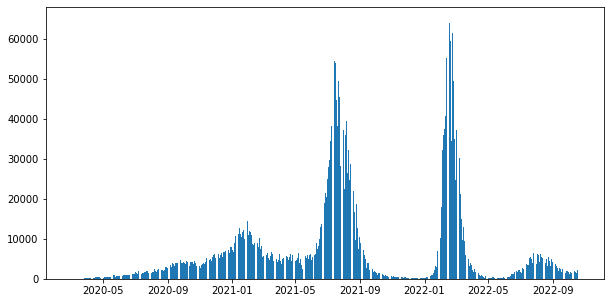

In [23]:
import numpy as np
import pandas as pd
import requests
resp_indo = requests.get('https://data.covid19.go.id/public/api/update.json?_=1665726783937', verify=False)
cov_indo_raw = resp_indo.json()
cov_indo = pd.DataFrame(df_indo)

cov_indo_tidy = (cov_indo.drop(columns=[item for item in cov_indo.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('POSITIF')])
                           .rename(columns=str.lower)
                           .rename(columns={'jumlah_positif': 'kasus_positif'})
                  )
cov_indo_tidy['tanggal'] = pd.to_datetime(cov_indo_tidy['tanggal'])

import matplotlib.pyplot as plt

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_indo_tidy, x='tanggal', height='kasus_positif')
plt.show()

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


<Figure size 432x288 with 0 Axes>

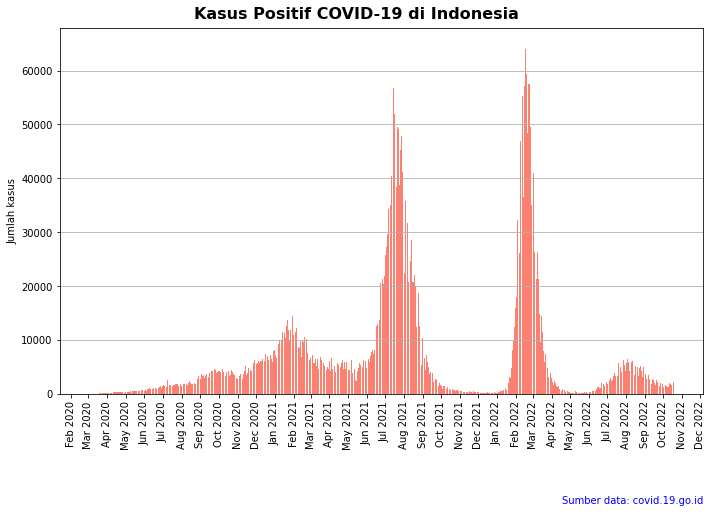

In [18]:
import numpy as np
import pandas as pd
import requests
resp_indo = requests.get('https://data.covid19.go.id/public/api/update.json?_=1665726783937', verify=False)
cov_indo_raw = resp_indo.json()
cov_indo = pd.DataFrame(df_indo)

cov_indo_tidy = (cov_indo.drop(columns=[item for item in cov_indo.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('POSITIF')])
                           .rename(columns=str.lower)
                           .rename(columns={'jumlah_positif': 'kasus_positif'})
                  )
cov_indo_tidy['tanggal'] = pd.to_datetime(cov_indo_tidy['tanggal'])



import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,7))
ax.bar(data=cov_indo_tidy, x='tanggal', height='kasus_positif', color='salmon')
fig.suptitle('Kasus Positif COVID-19 di Indonesia', 
             y=1.02, fontsize=16, fontweight='bold', ha='center')


ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


<Figure size 432x288 with 0 Axes>

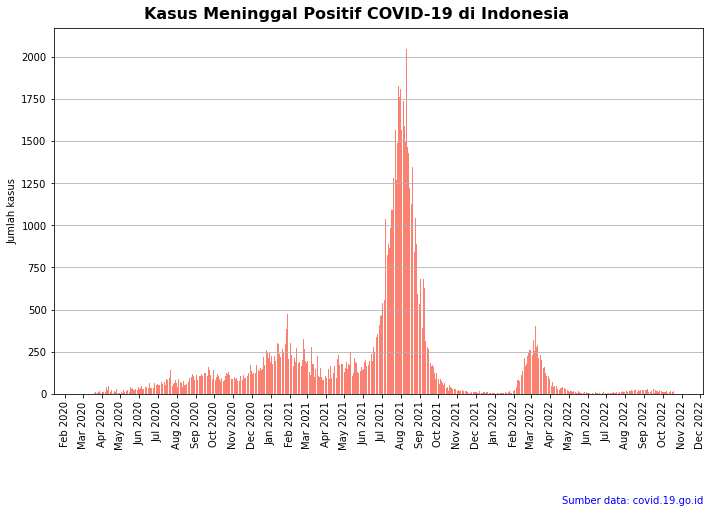

In [19]:
import numpy as np
import pandas as pd
import requests
resp_indo = requests.get('https://data.covid19.go.id/public/api/update.json?_=1665726783937', verify=False)
cov_indo_raw = resp_indo.json()
cov_indo = pd.DataFrame(df_indo)

cov_indo_tidy = (cov_indo.drop(columns=[item for item in cov_indo.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('MENINGGAL')])
                           .rename(columns=str.lower)
                           .rename(columns={'jumlah_meninggal': 'kasus_meninggal'})
                  )
cov_indo_tidy['tanggal'] = pd.to_datetime(cov_indo_tidy['tanggal'])



import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,7))
ax.bar(data=cov_indo_tidy, x='tanggal', height='kasus_meninggal', color='salmon')
fig.suptitle('Kasus Meninggal Positif COVID-19 di Indonesia', 
             y=1.02, fontsize=16, fontweight='bold', ha='center')


ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

Setelah mengamati grafik perkembangan kasus Anda menyadari bahwa terjadi fluktuasi pertambahan kasus harian. Dilandasi hal tersebut Anda kemudian ingin mencoba mengamati bagaimana perkembangan kasus dalam rentang waktu pekanan. Bagaimanakah caranya?

In [20]:
import numpy as np
import pandas as pd
import requests
resp_indo = requests.get('https://data.covid19.go.id/public/api/update.json?_=1665726783937', verify=False)
cov_indo_raw = resp_indo.json()
cov_indo = pd.DataFrame(df_indo)

cov_indo_tidy = (cov_indo.drop(columns=[item for item in cov_indo.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('POSITIF')])
                           .rename(columns=str.lower)
                           .rename(columns={'jumlah_positif': 'kasus_positif'})
                  )


cov_indo_tidy['tanggal'] = pd.to_datetime(cov_indo_tidy['tanggal'])
cov_indo_pekanan = (cov_indo_tidy.set_index('tanggal')['kasus_positif']
                                   .resample('W')
                                   .sum()
                                   .reset_index()
                                   .rename(columns={'kasus_positif': 'jumlah'})
                    )
cov_indo_pekanan['tahun'] = cov_indo_pekanan['tanggal'].apply(lambda x: x.year)
cov_indo_pekanan['pekan_ke'] = cov_indo_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_indo_pekanan = cov_indo_pekanan[['tahun', 'pekan_ke', 'jumlah']]

print('Info cov_indo_pekanan:')
print(cov_indo_pekanan.info())
print('\nLima data teratas cov_indo_pekanan:\n', cov_indo_pekanan.head())

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Info cov_indo_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     138 non-null    int64
 1   pekan_ke  138 non-null    int64
 2   jumlah    138 non-null    int64
dtypes: int64(3)
memory usage: 3.4 KB
None

Lima data teratas cov_indo_pekanan:
    tahun  pekan_ke  jumlah
0   2020        10       6
1   2020        11     111
2   2020        12     397
3   2020        13     771
4   2020        14     988


Pertanyaan baru muncul di benak Anda setelah melakukan inspeksi terhadap data cov_jabar_pekanan tersebut: "Apakah pekan ini lebih baik dari pekan kemarin?"

In [21]:
import numpy as np
import pandas as pd
import requests
resp_indo = requests.get('https://data.covid19.go.id/public/api/update.json?_=1665726783937', verify=False)
cov_indo_raw = resp_indo.json()
cov_indo = pd.DataFrame(df_indo)

cov_indo_tidy = (cov_indo.drop(columns=[item for item in cov_indo.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('POSITIF')])
                           .rename(columns=str.lower)
                           .rename(columns={'jumlah_positif': 'kasus_positif'})
                  )


cov_indo_tidy['tanggal'] = pd.to_datetime(cov_indo_tidy['tanggal'])
cov_indo_pekanan = (cov_indo_tidy.set_index('tanggal')['kasus_positif']
                                   .resample('W')
                                   .sum()
                                   .reset_index()
                                   .rename(columns={'kasus_positif': 'jumlah'})
                    )
cov_indo_pekanan['tahun'] = cov_indo_pekanan['tanggal'].apply(lambda x: x.year)
cov_indo_pekanan['pekan_ke'] = cov_indo_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_indo_pekanan = cov_indo_pekanan[['tahun', 'pekan_ke', 'jumlah']]

cov_indo_pekanan['jumlah_pekanlalu'] = cov_indo_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)
cov_indo_pekanan['lebih_baik'] = cov_indo_pekanan['jumlah'] < cov_indo_pekanan['jumlah_pekanlalu']

print('Sepuluh data teratas:\n', cov_indo_pekanan.head(10))

print('Info cov_indo_pekanan:')
print(cov_indo_pekanan.info())
print('\nLima data teratas cov_indo_pekanan:\n', cov_indo_pekanan.head())

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Sepuluh data teratas:
    tahun  pekan_ke  jumlah  jumlah_pekanlalu  lebih_baik
0   2020        10       6                 0       False
1   2020        11     111                 6       False
2   2020        12     397               111       False
3   2020        13     771               397       False
4   2020        14     988               771       False
5   2020        15    1968               988       False
6   2020        16    2334              1968       False
7   2020        17    2307              2334        True
8   2020        18    2310              2307       False
9   2020        19    2840              2310       False
Info cov_indo_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   tahun             138 non-null    int64
 1   pekan_ke          138 non-null    int64
 2   jumlah            138 non-null    int6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Anda sungguh luar biasa! Dengan menggunakan data hasil perhitungan tersebut maka sekarang Anda dapat membuat bar-chat penambahan kasus pekanan yang ditambahkan informasi baru untuk menjawab pertanyaan: "Apakah pekan ini lebih baik?"

<Figure size 432x288 with 0 Axes>

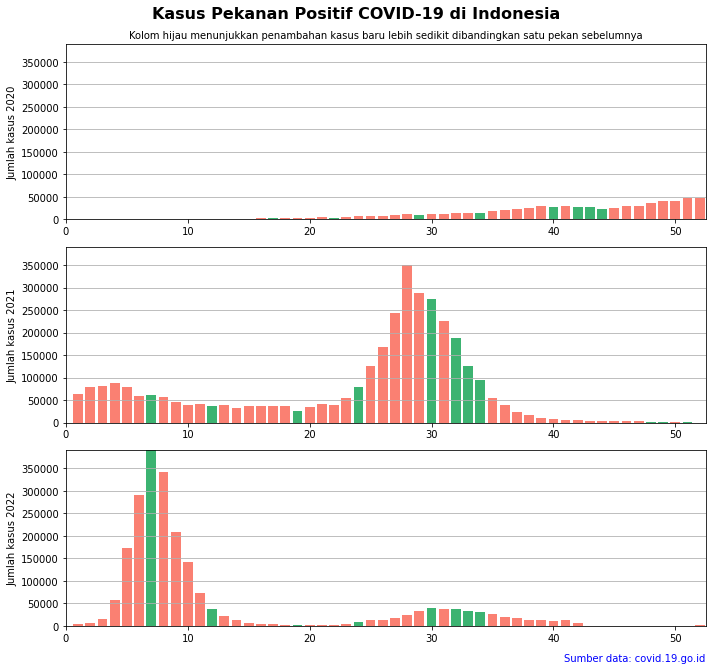

In [42]:
import matplotlib.pyplot as plt

plt.clf()
jml_tahun_terjadi_covid19 = cov_indo_pekanan['tahun'].nunique()
tahun_terjadi_covid19 = cov_indo_pekanan['tahun'].unique()
fig, axes = plt.subplots(nrows=jml_tahun_terjadi_covid19, 
                         figsize=(10,3*jml_tahun_terjadi_covid19))

fig.suptitle('Kasus Pekanan Positif COVID-19 di Indonesia', 
             y=1.02, fontsize=16, fontweight='bold', ha='center')
for i, ax in enumerate(axes):
    ax.bar(data=cov_indo_pekanan.loc[cov_indo_pekanan['tahun']==tahun_terjadi_covid19[i]], 
           x='pekan_ke', height='jumlah', 
           color=['mediumseagreen' if x is True else 'salmon' 
                  for x in cov_indo_pekanan['lebih_baik']])
    if i == 0:
        ax.set_title('Kolom hijau menunjukkan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya',
                     fontsize=10)
    elif i == jml_tahun_terjadi_covid19-1:
        ax.text(1, -0.2, 'Sumber data: covid.19.go.id', color='blue',
            ha='right', transform=ax.transAxes)

    ax.set_xlim([0, 52.5])
    ax.set_ylim([0, max(cov_indo_pekanan['jumlah'])])
    ax.set_xlabel('')
    ax.set_ylabel('Jumlah kasus %d'%(tahun_terjadi_covid19[i],))
    ax.grid(axis='y')

plt.tight_layout()
plt.show()